In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy.io as io
from Pred_local_lifetime import LLE
from Prep_exp_data import prep_exp_data
from Neural_implict_interploation import NIII_process
from utils import plot_image, plot_images,timer
import mat73
import warnings
warnings.filterwarnings('ignore')

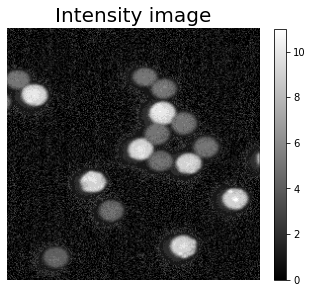

In [11]:
#load data
sample_name = 'microsphere_2p_1' #microsphere_2p_1, microsphere_2p_2
irf_file = 'irf_measure'
data = mat73.loadmat(f'./sample_data/{sample_name}.mat')
irf_data = mat73.loadmat(f'./sample_data/{irf_file}.mat')
hist2d = data['Hist'].astype('float32')
irf = irf_data['irf'].astype('float32')
Int = hist2d.sum(2)
plot_image(Int, title = 'Intensity image',max_value = Int.max())

Complete 'LLE' in 0.2263 secs
Complete 'NIII_process' in 0.3764 secs


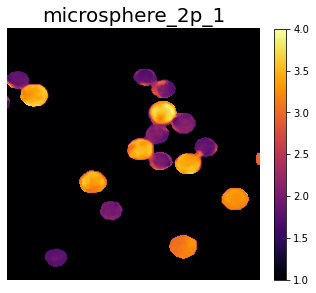

In [12]:
patch_size = 8
int_thres = 4

# Preprocess, Masking the image
Int[Int<int_thres]=0 
Mask = Int
hist2d_mask = hist2d
for i in range(256):
    for j in range(256):
        if Mask[i,j]==0:
            hist2d_mask[i,j,:]=np.zeros(256)
            
Int_mask = hist2d_mask.sum(-1)

# Step 1, Evaluating local fluorescence lifetime
lr_tau = LLE(hist2d_mask,irf,r = patch_size, bin_w = 0.039)

# Step 2, Neural implict interploation
nii_data = prep_exp_data(Mask,lr_tau).prep_data()
result = NIII_process(nii_data,ratio = patch_size)
pred_image =np.squeeze(result,(0,1)) 
pred_image[pred_image<0] = 0

plot_image(pred_image, title = f'{sample_name}',min_value = 1, max_value = 4,colormap='inferno')